In [144]:
import numpy as np
import pandas as pd
import os
import csv
import cv2 as cv

In [145]:
# Read the file containing image labels
file_path_label = 'C:/VinterILand/Files/StudyMat/Current/AI/Project/archive/trainLabels_cropped.csv'
home_data_label = pd.read_csv(file_path_label)


In [146]:

# Set the directory path and read the image labels
dir_name = 'C:/VinterILand/Files/StudyMat/Current/AI/Project/archive/resized_train_cropped/resized_train_cropped/'
directory = os.fsencode(dir_name)


train_Labels = pd.read_csv('C:/VinterILand/Files/StudyMat/Current/AI/Project/archive/trainLabels_cropped.csv')
labels = pd.read_csv('C:/VinterILand/Files/StudyMat/Current/AI/Project/archive/trainLabels_cropped.csv', names=['level'])

# Create a .csv file to store the calculated features for decision tree
header = ['nameImg', 'meanR', 'meanG', 'meanB', 'devR', 'devG', 'devB', 'class']


In [147]:
# with open('./csv_features', 'w', encoding='UTF8') as f:

#     writer = csv.writer(f)
#     writer.writerow(header)
#     for file in os.listdir(directory):
#         filename = os.fsdecode(file)
#         filename_base = os.path.basename(filename)
#         if filename_base.endswith('.jpeg'):
#             index = train_Labels.index
#             condition = train_Labels["image"] == filename_base[:-5]
#             indx = index[condition]
#             classImg = train_Labels["level"].loc[indx]
#             level = classImg.tolist()
#             img = cv.imread(dir_name+filename_base)
#             norm_img = cv.imread(dir_name+filename)
#             final_img = cv.normalize(img, norm_img, 0, 255, cv.NORM_MINMAX)
#             means, dev = cv.meanStdDev(final_img)
#             f1_0 = means[0]
#             f1_1 = means[1]
#             f1_2 = means[2]
#             f2_0 = dev[0]
#             f2_1 = dev[1]
#             f2_2 = dev[2]
#             data = [filename, *f1_0, *f1_1, *f1_2, *f2_0, *f2_1, *f2_2, *level]
#             writer.writerow(data)
#             continue
#         else:
#             continue

In [148]:
# Read the CSV file containing the calculated features
csv_data = pd.read_csv('csv_features' )
csv_data.head()

,nameImg,meanR,meanG,meanB,devR,devG,devB,class
0,10003_left.jpeg,70.469093,85.899770,104.938448,44.330996,55.886613,67.852609,0
1,10003_right.jpeg,73.200195,89.763735,110.117472,46.435583,58.517427,71.347122,0
2,10007_left.jpeg,72.073061,92.022150,90.303785,44.341474,56.717783,55.590012,0
3,10007_right.jpeg,64.937254,87.538883,89.420093,38.538292,53.817290,55.585351,0
4,10009_left.jpeg,71.700989,89.570619,109.586108,34.372742,43.133923,54.769112,0


In [149]:
# Define the features (mean and standard deviation) and the target variable
features = ['meanR', 'meanG', 'meanB', 'devR', 'devG', 'devB']
X = csv_data[features]
y = csv_data['class']


In [150]:
from sklearn.semi_supervised import LabelPropagation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix

# Split the data into labeled and unlabeled portions
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.7, random_state=0, stratify=y)

# Train the decision tree model on labeled data
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_labeled, y_labeled)

# Propagate labels using LabelPropagation
label_propagation = LabelPropagation()
label_propagation.fit(X_labeled, y_labeled)
y_unlabeled_propagated = label_propagation.predict(X_unlabeled)

# Combine labeled and unlabeled data
X_combined = np.concatenate((X_labeled, X_unlabeled))
y_combined = np.concatenate((y_labeled, y_unlabeled_propagated))

# Retrain the decision tree model on combined data
decision_tree_model.fit(X_combined, y_combined)

# Evaluate the model on labeled data
y_pred_labeled = decision_tree_model.predict(X_labeled)
mae_labeled = mean_absolute_error(y_labeled, y_pred_labeled)
accuracy_labeled = accuracy_score(y_labeled, y_pred_labeled)
confusion_matrix_labeled = confusion_matrix(y_labeled, y_pred_labeled)

# Evaluate the model on unlabeled data using propagated labels
y_pred_unlabeled = decision_tree_model.predict(X_unlabeled)
mae_unlabeled = mean_absolute_error(y_unlabeled, y_pred_unlabeled)
accuracy_unlabeled = accuracy_score(y_unlabeled, y_pred_unlabeled)
confusion_matrix_unlabeled = confusion_matrix(y_unlabeled, y_pred_unlabeled)

print("Mean Absolute Error (labeled data):", mae_labeled)
print("Accuracy (labeled data):", accuracy_labeled)
print("Confusion Matrix (labeled data):\n", confusion_matrix_labeled)

print("Mean Absolute Error (unlabeled data):", mae_unlabeled)
print("Accuracy (unlabeled data):", accuracy_unlabeled)
print("Confusion Matrix (unlabeled data):\n", confusion_matrix_unlabeled)

Mean Absolute Error (labeled data): 0.0
Accuracy (labeled data): 1.0
Confusion Matrix (labeled data):
 [[3060    0    0    0    0]
 [   0  289    0    0    0]
 [   0    0  636    0    0]
 [   0    0    0  107    0]
 [   0    0    0    0   82]]
Mean Absolute Error (unlabeled data): 0.7163535571296581
Accuracy (unlabeled data): 0.6265270506108203
Confusion Matrix (unlabeled data):
 [[5820  366  744  124   87]
 [ 530   53   79    9    5]
 [1131   85  216   31   21]
 [ 198   16   20    9    6]
 [ 158    4   22    2    5]]


C:\Users\tript\AppData\Roaming\Python\Python311\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\tript\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\tript\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


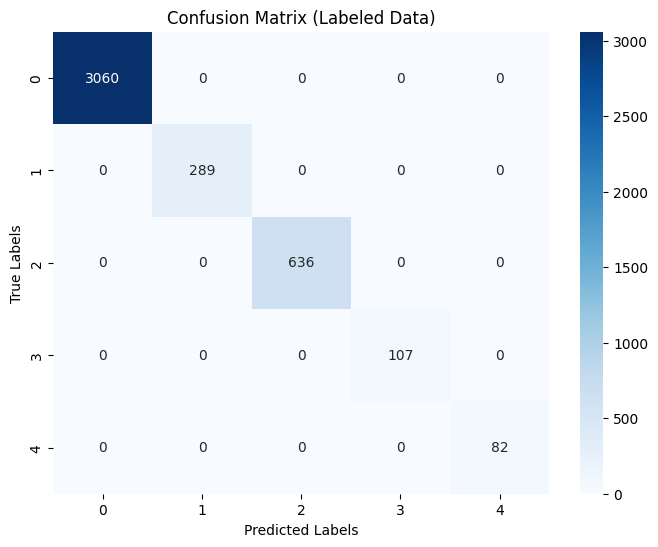

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix for labeled data:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_labeled, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix (Labeled Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


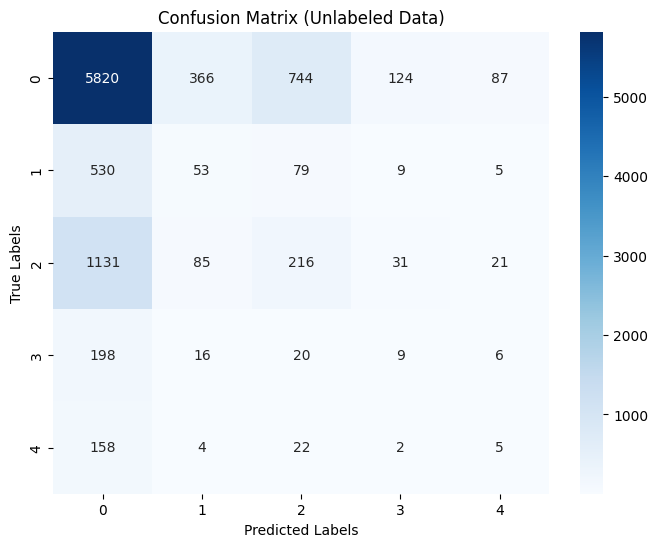

In [152]:
# Plot the confusion matrix for unlabeled data:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_unlabeled, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix (Unlabeled Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


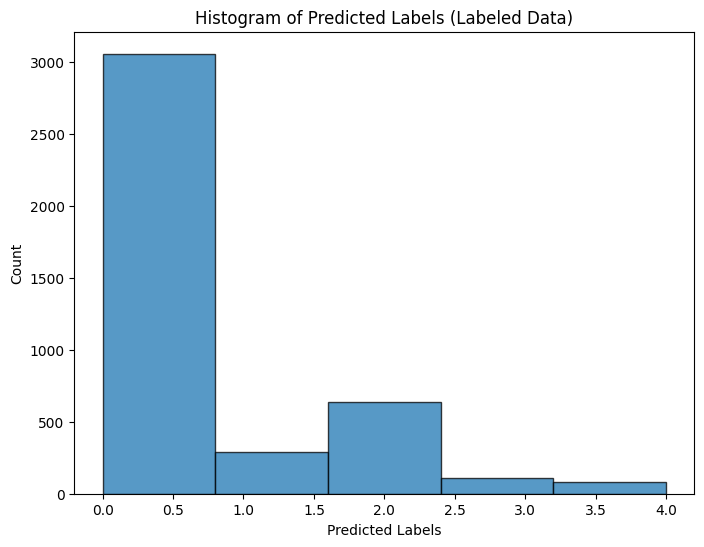

In [153]:
# Plot a histogram of the predicted labels for labeled data:
plt.figure(figsize=(8, 6))
plt.hist(y_pred_labeled, bins=len(np.unique(y)), edgecolor='black', alpha=0.75)
plt.title('Histogram of Predicted Labels (Labeled Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.show()


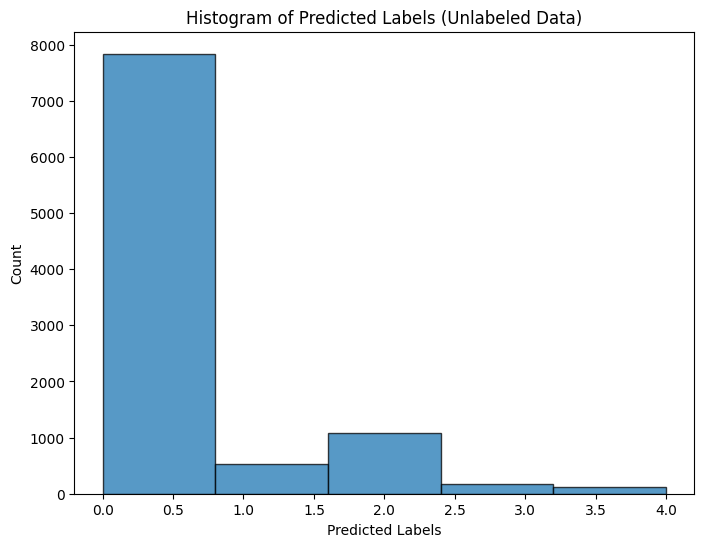

In [154]:
# Plot a histogram of the predicted labels for unlabeled data:
plt.figure(figsize=(8, 6))
plt.hist(y_pred_unlabeled, bins=len(np.unique(y)), edgecolor='black', alpha=0.75)
plt.title('Histogram of Predicted Labels (Unlabeled Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.show()


In [155]:
# Print actual and predicted values for the first 10 samples
print(y_unlabeled[:10])
print(y_pred_unlabeled[:10])

10456    0
6007     1
10578    0
8635     0
5822     1
7679     0
9722     0
11444    2
1942     0
13044    0
Name: class, dtype: int64
[0 0 0 0 0 0 0 0 0 0]


In [156]:
# Calculate the absolute errors
errors = abs(y_pred_unlabeled - y_unlabeled)
print (errors)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_unlabeled)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

10456    0
6007     1
10578    0
8635     0
5822     1
        ..
12395    0
1862     0
3069     0
9591     0
5001     0
Name: class, Length: 9741, dtype: int64
Accuracy: -inf %.


In [157]:
# Create a new CSV file to store the features of a test image
with open('./testImage_features', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(features)

    # Read and normalize a test image
    img = cv.imread(dir_name+'10003_left.jpeg')
    norm_img = img
    final_img = cv.normalize(img, norm_img, 0, 255, cv.NORM_MINMAX)

    # Calculate the features for the test image
    means, dev = cv.meanStdDev(final_img)
    data = [*means[0], *means[1], *means[2], *dev[0], *dev[1], *dev[2]]
    writer.writerow(data)

In [158]:
# Read the features of the test image from the CSV file
csv_data = pd.read_csv('./testImage_features' )
X = csv_data[features]

In [159]:
# Make predictions on the test image
val_predictions = decision_tree_model.predict(X)
print('Level of image: ' + str(val_predictions))

Level of image: [0]


C:\Users\tript\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [160]:

# Perform a grid search to find the best parameters for the decision tree model
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [4,5,7,10,15,20]}
grid = GridSearchCV(decision_tree_model, param_grid=param_grid, cv=5)
grid.fit(X_labeled, y_labeled)

print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.2f}")


Best parameters: {'max_depth': 4}
Best cross-validation score: 0.73


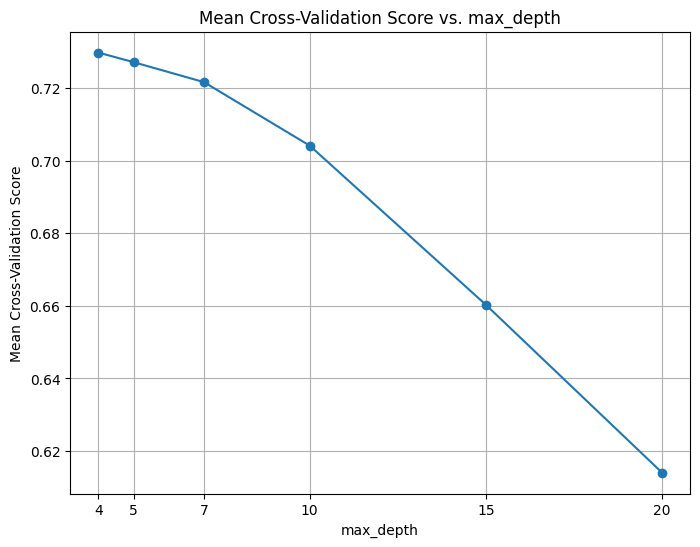

In [161]:
# plot a line graph of the mean cross-validation scores for each max_depth value
max_depth_values = [4, 5, 7, 10, 15, 20]
mean_scores = grid.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, mean_scores, marker='o')
plt.title('Mean Cross-Validation Score vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Cross-Validation Score')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()


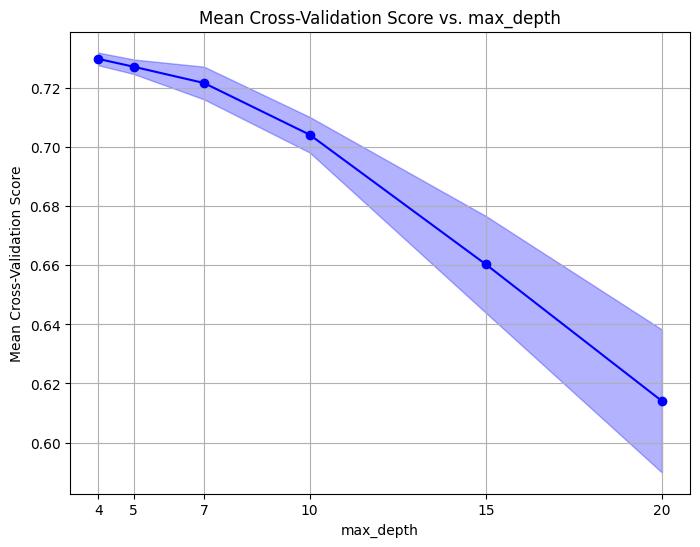

In [162]:
max_depth_values = [4, 5, 7, 10, 15, 20]
mean_scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']

plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, mean_scores, marker='o', color='blue')
plt.fill_between(max_depth_values, mean_scores - std_scores, mean_scores + std_scores, color='blue', alpha=0.3)
plt.title('Mean Cross-Validation Score vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Cross-Validation Score')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()
